# Autor: DIEGO SANZ VILLAFRUELA
# Algoritmia  <font color="red">NOTA:10
### Práctica 6
El objetivo de esta práctica es trabajar con métodos divide y venceras.

Se pide la implementación de las clases y/o funciones que aparecen a continuación.

Las instrucción "pass" que aparecen en el cuerpo de las clases o funciones, se debe sustituir por la implementación adecuada.

Para cada clase o función que se pide se proporciona una o más funciones con algunos tests.

Al llamar a las funciones de test no debería saltar ninguna aserción.

### Exponenciación   <font color="red">OK

In [1]:
"""
    Utiliza el método divide y vencerás para indicar cómo elevar a la n, siendo 
    n un número natural.
    Devuelve una lista, donde cada elemento se corresponde con una 
    multiplicación.
    Las multiplicaciones se representan como tuplas de 3 elementos: el
    exponente del resultado y los exponentes de los dos elementos multiplicados,
    en orden decreciente.
    Las multiplicaciones tienen que estar en la lista en el orden en el que
    se realizarían.
"""
def exponenciacion_divide_y_venceras(n):
    lista = []
    if n % 2 == 0:
        div = n//2
        if n // 2 != 1:
            lista = exponenciacion_divide_y_venceras( div )
        lista.append( ( n, div, div ) )
        return lista
    else:
        lista = exponenciacion_divide_y_venceras( n - 1 )
        lista.append( ( n , n - 1 , 1 ) )
        return lista            

In [3]:
"""
    Utiliza el método iterativo basado en la representación binaria del 
    exponente para indicar cómo elevar a la n, siendo n un número natural.
    Devuelve una lista, donde cada elemento se corresponde con una
    multiplicación.
    Las multiplicaciones se representan como tuplas de 3 elementos: el
    exponente del resultado y los exponentes de los dos elementos multiplicados,
    en orden decreciente.
    Las multiplicaciones tienen que estar en la lista en el orden en el que
    se realizarían.
    def exponenciacion_iterativa(n):
"""
def exponenciacion_iterativa(n):
    lista = []
    indice = n
    r = 0
    a = 1
    while indice > 0:
        if indice % 2 == 1:
            if r != 0:
                lista.append((r+a, a, r));
            r = r + a
            if indice == 1:
                break
        lista.append((a+a, a, a));
        a += a
        indice = indice // 2
    
    return lista

In [4]:
"""
    Comprueba si una lista de multiplicaciones calcula la pontencia a la n.
    Las multiplicaciones se expresan como tuplas de 3 elementos, con los
    exponentes del resultado y de los multiplicandos.
"""
def comprueba_multiplicaciones(n, multiplicaciones):
    calculados = set([1])
    for m in multiplicaciones:
        if (m[1] not in calculados or m[2] not in calculados
            or m[0] != m[1] + m[2]):
            return False
        calculados.add(m[0])
    return m[0] == n

In [5]:
"""Devuelve una cadena con la representación de las multiplicaciones."""
def cadena_multiplicaciones(multiplicaciones, base = "a"):
    
    return '\n'.join(
        "{0}^{1} = {0}^{2} * {0}^{3}".format(base, *m)
        for m in multiplicaciones)

if __name__ == "__main__": 
    print(cadena_multiplicaciones([(2, 1, 1), (3, 2, 1), (6, 3, 3), (12, 6, 6), 
        (24, 12, 12), (25, 24, 1), (50, 25, 25), (100, 50, 50)]))    

a^2 = a^1 * a^1
a^3 = a^2 * a^1
a^6 = a^3 * a^3
a^12 = a^6 * a^6
a^24 = a^12 * a^12
a^25 = a^24 * a^1
a^50 = a^25 * a^25
a^100 = a^50 * a^50


In [6]:
from math import log

def test_exponenciacion():
    """
    Tests para funciones que indican cómo elevar a un número natural
    utilizando multiplicaciones.
    """
    
    multiplicaciones = exponenciacion_divide_y_venceras(100)
    
    
    assert multiplicaciones == [(2, 1, 1), (3, 2, 1), (6, 3, 3), (12, 6, 6), 
        (24, 12, 12), (25, 24, 1), (50, 25, 25), (100, 50, 50)]
    
    assert cadena_multiplicaciones(multiplicaciones) == ("""a^2 = a^1 * a^1
a^3 = a^2 * a^1
a^6 = a^3 * a^3
a^12 = a^6 * a^6
a^24 = a^12 * a^12
a^25 = a^24 * a^1
a^50 = a^25 * a^25
a^100 = a^50 * a^50""")
    
    multiplicaciones = exponenciacion_iterativa(100)
    print(multiplicaciones)
    print ("///////")
    print (cadena_multiplicaciones(multiplicaciones))
    print ("****************")
    
    assert multiplicaciones == [(2, 1, 1), (4, 2, 2), (8, 4, 4), (16, 8, 8), 
        (32, 16, 16), (36, 32, 4), (64, 32, 32), (100, 64, 36)]
    assert cadena_multiplicaciones(multiplicaciones) == ("""a^2 = a^1 * a^1
a^4 = a^2 * a^2
a^8 = a^4 * a^4
a^16 = a^8 * a^8
a^32 = a^16 * a^16
a^36 = a^32 * a^4
a^64 = a^32 * a^32
a^100 = a^64 * a^36""")
    
    for metodo_exponenciacion in (exponenciacion_divide_y_venceras, 
                                  exponenciacion_iterativa):
        for n in range(2,10000):
            multiplicaciones = metodo_exponenciacion(n)
            assert comprueba_multiplicaciones(n, multiplicaciones)
            assert len(multiplicaciones) <= 2 * log(n, 2)
        
if __name__ == "__main__": 
    test_exponenciacion()
    print("OK")

[(2, 1, 1), (4, 2, 2), (8, 4, 4), (16, 8, 8), (32, 16, 16), (36, 32, 4), (64, 32, 32), (100, 64, 36)]
///////
a^2 = a^1 * a^1
a^4 = a^2 * a^2
a^8 = a^4 * a^4
a^16 = a^8 * a^8
a^32 = a^16 * a^16
a^36 = a^32 * a^4
a^64 = a^32 * a^32
a^100 = a^64 * a^36
****************
OK


### Torres de Hanoi  <font color="red">OK

In [7]:
# Para dibujar las torres:

%matplotlib inline

import matplotlib.pyplot as plt


In [10]:
class Hanoi:
    """Clase para representar las torres de Hanoi."""

    def __init__(self, discos):
        """
        El parámetro discos es un entero o una secuencia.
        Si es un entero se refiere al número de discos en el primer poste.
        Si es una secuencia, cada elemento indica en qué poste está el disco.
        Los postes se identifican como 1, 2 y 3.
        El primer elemento de la secuencia se refiere al disco más pequeño,
        el último al más grande.
        """
        
        if isinstance(discos, int):
            discos = [1] * discos # todos los discos en el poste 1
            self._num = True
        else:
            # comprobamos que los valores de la secuencia sean correctos
            assert all(1 <= d <= 3 for d in discos)
            self._num = False
            self._array = discos
            

        self._discos = list(discos)

        # Almacenamos los postes como una lista de 3 listas
        self._postes = [[], [], []]
        i = len(discos)
        for d in discos[::-1]:
            self._postes[d - 1].append(i)
            i -= 1

    def __len__(self):
        """Devuelve el número de discos"""
        
        return len(self._discos)

    def mueve(self, origen, destino):
        """Mueve el disco superior del poste origen al poste destino."""
        
        assert 1 <= origen <= 3
        assert 1 <= destino <= 3

        poste_origen = self._postes[origen - 1]
        poste_destino = self._postes[destino - 1]
        
        assert len(poste_origen) > 0 # hay discos en el poste origen
        disco = poste_origen[-1]
        
        # comprobamos si podemos mover el disco:
        assert (len(poste_destino) == 0 # el destino está vacío
                or disco < poste_destino[-1]) # contiene un disco mayor

        # movemos:
        self._discos[disco - 1] = destino
        poste_origen.pop()
        poste_destino.append(disco)

    def __str__(self):
        return str(self._discos)

    def __repr__(self):
        return str(self)
    
    def realiza_movimientos(self, movimientos, imprime = False, dibuja = False):
        """
        Realiza varios movimientos, cada movimiento se indica como un par
        (origen, destino).
        """
        
        if imprime:
            self.imprime()
        if dibuja:
            self.dibuja()
        for origen, destino in movimientos:
            self.mueve(origen, destino)
            if imprime:
                print("\n", origen, "->", destino, sep="")
                self.imprime()
            if dibuja:
                self.dibuja()

    def imprime(self):        
        """Imprime una representación gráfica de las torres"""

        n = len(self)
        for nivel in range(len(self) - 1, -1, -1):
            for poste in self._postes:
                if nivel >= len(poste):
                    print("|", " " * (n - 1), sep="", end=" ")
                else:
                    disco = poste[nivel]
                    print("X" * disco, " " * (n - disco), sep="", end=" ")
            print()
        for poste in self._postes:
            print("=" * n, sep=" ", end=" ")
        print()
        
    def dibuja(self):
        axs = []
        f, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(3,1))
        n = len(self)
        for a, p in zip(axs, self._postes):
            a.set_aspect(1)
            a.axis('off')
            p = p + [0] * (n - len(p))
            left = [(n - x) / 2 for x in p]
            a.barh(range(n), p, height=1, left=left)
        plt.tight_layout()
        plt.show()
        
    """
        Metodo recursivo de hannoi
    """
    def hanoi(self,n, origen , destino , auxiliar, lista):
        
        if n == 1:
            self.mueve( origen , destino )
            lista.append((origen,destino))
            return
      
        self.hanoi( n - 1, origen , auxiliar , destino, lista )
        lista.append((origen,destino))
        self.mueve( origen , destino )
        self.hanoi( n - 1, auxiliar , destino , origen, lista )
        
    def resuelve(self, destino=3):
        """
        Resuelve el problema, moviendo todos los discos al poste destino,
        partiendo de cualquier configuración inicial.

        Devuelve una secuencia con los movimientos, cada movimiento es un par
        (origen, destino).
        """
        lista=[]
        origen = 0
        aux = 0
        
        '''
            en el caso de que sea una lista [ a, b , c , d , e]
                colocamos (a) en b,
                colocamos (a,b) en c,
                colocamos (a,b,c) en d,
                colocamos (a,b,c,d) en e
            
            Teniendo al final ( a , b, c, d, e,) en un palo
        '''
        if not self._num:
            conjunto = 1
            numeroPlatos = len(self._array)
            while conjunto < numeroPlatos:
                orig = self._array[conjunto-1]
                dest = self._array[conjunto]
                auxiliar = 6 - (orig + dest)
                if orig != dest:
                    self.hanoi(conjunto, orig, dest, auxiliar, lista)
                conjunto += 1
            
            origen = self._array[-1]
        else:
            origen = 1
            
        aux = 6 - ( origen + destino ) 
      
        self.hanoi(len(self),origen,destino,aux,lista)
        return lista

Movimientos: [(1, 3), (1, 2), (3, 2), (1, 3), (2, 1), (2, 3), (1, 3)]
X   |   |   
XX  |   |   
XXX |   |   
=== === === 

1->3
|   |   |   
XX  |   |   
XXX |   X   
=== === === 

1->2
|   |   |   
|   |   |   
XXX XX  X   
=== === === 

3->2
|   |   |   
|   X   |   
XXX XX  |   
=== === === 

1->3
|   |   |   
|   X   |   
|   XX  XXX 
=== === === 

2->1
|   |   |   
|   |   |   
X   XX  XXX 
=== === === 

2->3
|   |   |   
|   |   XX  
X   |   XXX 
=== === === 

1->3
|   |   X   
|   |   XX  
|   |   XXX 
=== === === 


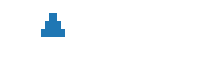

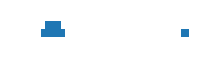

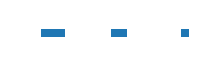

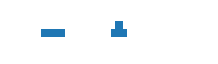

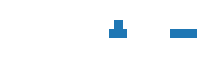

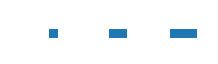

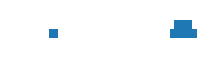

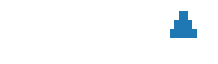

OK


In [11]:
def test_hanoi():
    """Tests para la clase Hanoi."""
    # 3 discos en el poste 1, mover al poste 3
    h = Hanoi(3)
    movimientos = h.resuelve()
    print ("Movimientos:",movimientos)
    assert str(h) == "[3, 3, 3]"
    h = Hanoi(3)
    h.realiza_movimientos(movimientos, imprime=True)
    h = Hanoi(3)
    h.realiza_movimientos(movimientos, dibuja=True)
    assert str(h) == "[3, 3, 3]"

    # 7 discos en el poste 1, mover al poste 2
    h = Hanoi(7)
    movimientos = h.resuelve(2)
    assert str(h) == str([2] * 7)
    h = Hanoi(7)
    h.realiza_movimientos(movimientos)
    assert str(h) == str([2] * 7)

    # 3 discos repartidos en los 3 postes
    h = Hanoi([1, 3, 2])
    movimientos = h.resuelve()
    assert str(h) == str([3] * 3)
    h = Hanoi([1, 3, 2])
    h.realiza_movimientos(movimientos)
    assert str(h) == str([3] * 3)  
    
    # 6 discos repartidos en los 3 postes
    h = Hanoi([2, 3, 3, 1, 1, 2])
    movimientos = h.resuelve()
    assert str(h) == str([3] * 6)
    h = Hanoi([2, 3, 3, 1, 1, 2])
    h.realiza_movimientos(movimientos)
    assert str(h) == str([3] * 6)        

    # 9 discos repartidos en los 3 postes
    h = Hanoi([2, 3, 3, 1, 1, 2, 3, 1, 2])
    movimientos = h.resuelve()
    assert str(h) == str([3] * 9)
    h = Hanoi([2, 3, 3, 1, 1, 2, 3, 1, 2])
    h.realiza_movimientos(movimientos)
    assert str(h) == str([3] * 9) 

    
if __name__ == "__main__": 
    test_hanoi()
    print("OK")